In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMAGE_PATH = './company-register-certificate.jpg'

In [3]:
reader = easyocr.Reader(['ne'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[379, 59], [433, 59], [433, 73], [379, 73]], 'ससक।र', 0.24168298927970344),
 ([[325, 83], [375, 83], [375, 101], [325, 101]],
  'उद्याग',
  0.6417584294736329),
 ([[215, 109], [303, 109], [303, 147], [215, 147]],
  'कम्पनी',
  0.7457043434143219),
 ([[445, 109], [555, 109], [555, 147], [445, 147]],
  'कार्यालय',
  0.557228473990311),
 ([[231, 161], [545, 161], [545, 197], [231, 197]],
  'कम्पनी दर्ताको प्रमाण पत्र',
  0.7310455360366654),
 ([[50, 200], [268, 200], [268, 230], [50, 230]],
  'दर्ता नंः   १४०८७६/०७२/०७३',
  0.3884854643620891),
 ([[55, 257], [77, 257], [77, 277], [55, 277]], 'श्री', 0.6145700254782461),
 ([[89, 246], [325, 246], [325, 283], [89, 283]],
  'ह्वाइट स्टोन होलिडे नेपाल',
  0.41879850611829356),
 ([[170, 284], [356, 284], [356, 310], [170, 310]],
  'लिमिटेड कम्पनी संम्वत्',
  0.4611495853908587),
 ([[367, 283], [425, 283], [425, 303], [367, 303]],
  '२० ७२',
  0.7543078352150113),
 ([[439, 283], [477, 283], [477, 301], [439, 301]], 'साल', 0.5213711706762091)

In [4]:
result[20]

([[133, 353], [198, 353], [198, 381], [133, 381]],
 'दिइएको',
 0.8757975469831912)

In [5]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [6]:
for i in result:
    print(result)


[([[379, 59], [433, 59], [433, 73], [379, 73]], 'ससक।र', 0.24168298927970344), ([[325, 83], [375, 83], [375, 101], [325, 101]], 'उद्याग', 0.6417584294736329), ([[215, 109], [303, 109], [303, 147], [215, 147]], 'कम्पनी', 0.7457043434143219), ([[445, 109], [555, 109], [555, 147], [445, 147]], 'कार्यालय', 0.557228473990311), ([[231, 161], [545, 161], [545, 197], [231, 197]], 'कम्पनी दर्ताको प्रमाण पत्र', 0.7310455360366654), ([[50, 200], [268, 200], [268, 230], [50, 230]], 'दर्ता नंः   १४०८७६/०७२/०७३', 0.3884854643620891), ([[55, 257], [77, 257], [77, 277], [55, 277]], 'श्री', 0.6145700254782461), ([[89, 246], [325, 246], [325, 283], [89, 283]], 'ह्वाइट स्टोन होलिडे नेपाल', 0.41879850611829356), ([[170, 284], [356, 284], [356, 310], [170, 310]], 'लिमिटेड कम्पनी संम्वत्', 0.4611495853908587), ([[367, 283], [425, 283], [425, 303], [367, 303]], '२० ७२', 0.7543078352150113), ([[439, 283], [477, 283], [477, 301], [439, 301]], 'साल', 0.5213711706762091), ([[490, 276], [562, 276], [562, 300], [4

In [7]:
result[20]

([[133, 353], [198, 353], [198, 381], [133, 381]],
 'दिइएको',
 0.8757975469831912)

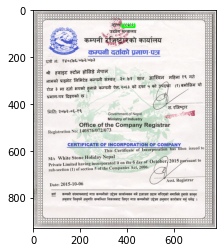

In [8]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

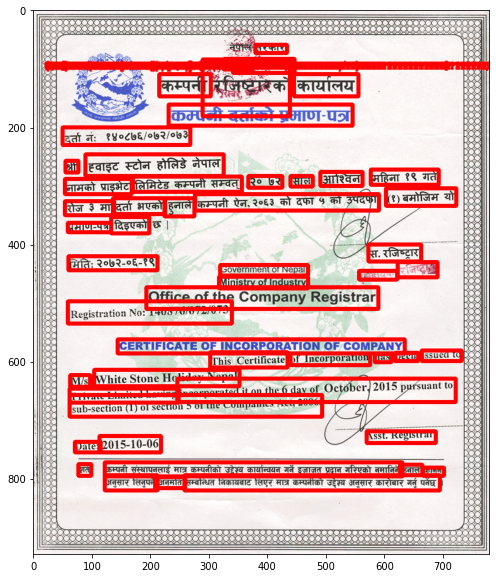

In [9]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(255,0,0),5)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,0,0),2,cv2.LINE_AA)
    
plt.figure(figsize=(10,10))   
plt.imshow(img)
plt.show()

In [10]:
text=''
for i in range(len(result)):
  text=text+result[i][1] + '\n'

ls = ['कार्यालय', 'कम्पनी दर्ताको प्रमाण पत्रव', 'दर्ताको', 'दर्ता मिति', 'कम्पनी ऐन', 'कार्यालय','CERTIFICATE','INCORPORATION','Date','Asst.Register','sub-section']
matches = [match for match in ls if text in match]
 
print('Buisness Certificate Verified')

Buisness Certificate Verified
